In [43]:
# Instalando Bibliotecas
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# Bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [45]:
torque = ctrl.Antecedent(np.arange(0, 201, 1), 'torque')
corrente_partida = ctrl.Antecedent(np.arange(0, 11, 0.1), 'corrente_partida')
folga_mecanica = ctrl.Antecedent(np.arange(0.0, 2.1, 0.01), 'folga_mecanica')
temperatura_ambiente = ctrl.Antecedent(np.arange(-20, 61, 1), 'temperatura_ambiente')
ruido_acustico = ctrl.Antecedent(np.arange(0, 67, 1), 'ruido_acustico')

risco_falha = ctrl.Consequent(np.arange(0, 101, 1), 'risco_falha')


In [46]:
# Funções de pertinência
torque['baixo'] = fuzz.trimf(torque.universe, [10, 25, 40])
torque['medio'] = fuzz.trimf(torque.universe, [40, 70, 100])
torque['alto'] = fuzz.trimf(torque.universe, [100, 150, 200])

corrente_partida['baixa'] = fuzz.trimf(corrente_partida.universe, [4, 5, 6])
corrente_partida['media'] = fuzz.trimf(corrente_partida.universe, [6, 7, 8]) 
corrente_partida['alta'] = fuzz.trimf(corrente_partida.universe, [8, 9, 10])

folga_mecanica['normal'] = fuzz.trapmf(folga_mecanica.universe, [0.1, 0.1, 0.5, 1.0])
folga_mecanica['moderada'] = fuzz.trimf(folga_mecanica.universe, [0.8, 1.2, 1.5])
folga_mecanica['excessiva'] = fuzz.gaussmf(folga_mecanica.universe, 1.8, 0.15)

temperatura_ambiente['baixa'] = fuzz.trimf(temperatura_ambiente.universe, [-20, -10, 0])
temperatura_ambiente['ideal'] = fuzz.trimf(temperatura_ambiente.universe, [0, 20, 40])
temperatura_ambiente['alta'] = fuzz.trimf(temperatura_ambiente.universe, [40, 50, 60])

ruido_acustico['baixo'] = fuzz.trimf(ruido_acustico.universe, [0, 30, 50])
ruido_acustico['aceitavel'] = fuzz.trapmf(ruido_acustico.universe, [50, 53, 63, 66])
ruido_acustico['alto'] = fuzz.trimf(ruido_acustico.universe, [64, 66, 69])

risco_falha['baixo'] = fuzz.trimf(risco_falha.universe, [0, 25, 50])
risco_falha['medio'] = fuzz.trimf(risco_falha.universe, [40, 60, 80])
risco_falha['alto'] = fuzz.trimf(risco_falha.universe, [70, 85, 100])

In [47]:
rule1 = ctrl.Rule(torque['alto'] | folga_mecanica['excessiva'], risco_falha['alto'])
"""Quando o torque é muito alto ou as folgas mecânicas estão excessivas, há risco de sobrecarga e desgaste estrutural, levando a um alto risco de falha no motor. Folgas excessivas são indicativo de desalinhamentos ou danos."""

rule2 = ctrl.Rule(corrente_partida['alta'] & temperatura_ambiente['alta'], risco_falha['alto'])
"""Alta corrente de partida combinada com temperatura ambiente elevada pode gerar sobreaquecimento e estresse térmico, condições críticas que aumentam significativamente o risco de falha."""

rule3 = ctrl.Rule(corrente_partida['baixa'] & temperatura_ambiente['ideal'] & folga_mecanica['normal'], risco_falha['baixo'])
"""Essa é uma situação ideal: baixa corrente de partida, temperatura adequada e folgas normais. O motor opera dentro de parâmetros seguros, indicando baixo risco de falha."""

rule4 = ctrl.Rule(ruido_acustico['alto'] | folga_mecanica['moderada'], risco_falha['medio'])
"""Ruídos elevados podem indicar desgaste interno ou vibração anormal, e folgas moderadas são um alerta precoce. A combinação sugere nível médio de risco, que exige monitoramento."""

rule5 = ctrl.Rule(torque['medio'] & corrente_partida['media'] & temperatura_ambiente['ideal'], risco_falha['medio'])
"""Mesmo que os parâmetros estejam dentro de limites aceitáveis, valores médios podem indicar carga constante e uso contínuo, o que justifica um risco moderado de falha."""

rule6 = ctrl.Rule(ruido_acustico['alto'] & temperatura_ambiente['alta'], risco_falha['alto'])
""" Ruído alto combinado com temperatura alta indica superaquecimento e possível falha iminente."""

rules = [rule1, rule2, rule3, rule4, rule5, rule6]

In [48]:
# Sistema de controle fuzzy
risco_ctrl = ctrl.ControlSystem(rules)
simulador = ctrl.ControlSystemSimulation(risco_ctrl)

# Entradas corrigidas e realistas:
simulador.input['torque'] = 110
simulador.input['corrente_partida'] = 8.5
simulador.input['folga_mecanica'] = 1.8
simulador.input['temperatura_ambiente'] = 45
simulador.input['ruido_acustico'] = 65

# Executa o sistema
simulador.compute()

# Resultado
print(f"Risco de falha estimado: {simulador.output['risco_falha']:.2f}%")

Risco de falha estimado: 72.39%



Entradas:
- Torque: 110.0 Nm
- Corrente de partida: 8.5 x In
- Folga mecânica: 1.800 mm
- Temperatura ambiente: 45.0 ºC
- Ruído acústico: 65.0 dB

Graus de pertinência:
→ Torque:
   - alto: 20.00%
→ Corrente de partida:
   - alta: 50.00%
→ Folga mecânica:
   - excessiva: 100.00%
→ Temperatura ambiente:
   - alta: 50.00%
→ Ruído acústico:
   - aceitavel: 33.33%
   - alto: 50.00%

Resultado fuzzy: Risco de Falha = 72.39%

Exibindo gráfico da saída...

Regras ativadas:
✔ Regra 1 ativada: torque alto OU folga excessiva
✔ Regra 2 ativada: corrente alta E temperatura alta
✔ Regra 4 ativada: ruído alto OU folga moderada


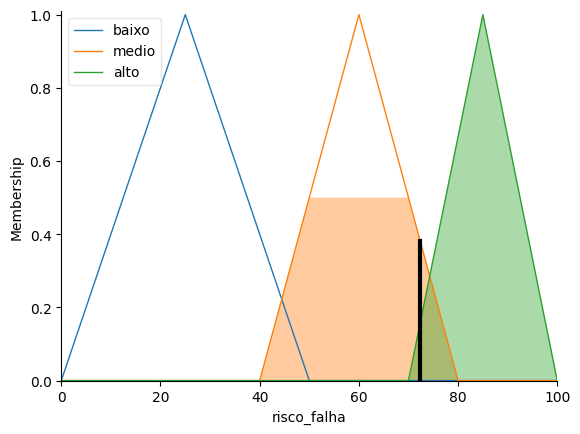

In [55]:
def regras_ativas_motor():
    try:
        # Entradas manuais
        torque_val = float(input("Torque (Nm - 0 a 200): "))
        corrente_val = float(input("Corrente de partida (múltiplo de In - 4 a 10): "))
        folga_val = float(input("Folga mecânica (mm - 0.0 a 2.0): "))
        temp_val = float(input("Temperatura ambiente (ºC - -20 a 60): "))
        ruido_val = float(input("Ruído acústico (dB - 0 a 66): "))

        # Validação básica
        if not (0 <= torque_val <= 200 and 4 <= corrente_val <= 10 and 0 <= folga_val <= 2 and
                -20 <= temp_val <= 60 and 0 <= ruido_val <= 69):
            print("⚠ Um ou mais valores estão fora dos limites permitidos.")
            return
        
        if not (4 <= corrente_val <= 10):
            print("⚠ Corrente de partida deve estar entre 4× e 10× In.")
            return

        # Mostrar valores informados
        print(f"\nEntradas:")
        print(f"- Torque: {torque_val} Nm")
        print(f"- Corrente de partida: {corrente_val} x In")
        print(f"- Folga mecânica: {folga_val:.3f} mm")
        print(f"- Temperatura ambiente: {temp_val} ºC")
        print(f"- Ruído acústico: {ruido_val} dB")

        # Mostrar graus de pertinência
        print("\nGraus de pertinência:")

        print("→ Torque:")
        for termo in torque.terms:
            grau = fuzz.interp_membership(torque.universe, torque[termo].mf, torque_val)
            if grau > 0:
                print(f"   - {termo}: {grau:.2%}")

        print("→ Corrente de partida:")
        for termo in corrente_partida.terms:
            grau = fuzz.interp_membership(corrente_partida.universe, corrente_partida[termo].mf, corrente_val)
            if grau > 0:
                print(f"   - {termo}: {grau:.2%}")

        print("→ Folga mecânica:")
        for termo in folga_mecanica.terms:
            grau = fuzz.interp_membership(folga_mecanica.universe, folga_mecanica[termo].mf, folga_val)
            if grau > 0:
                print(f"   - {termo}: {grau:.2%}")

        print("→ Temperatura ambiente:")
        for termo in temperatura_ambiente.terms:
            grau = fuzz.interp_membership(temperatura_ambiente.universe, temperatura_ambiente[termo].mf, temp_val)
            if grau > 0:
                print(f"   - {termo}: {grau:.2%}")

        print("→ Ruído acústico:")
        for termo in ruido_acustico.terms:
            grau = fuzz.interp_membership(ruido_acustico.universe, ruido_acustico[termo].mf, ruido_val)
            if grau > 0:
                print(f"   - {termo}: {grau:.2%}")
                

        # Inserir no sistema fuzzy
        simulador.input['torque'] = torque_val
        simulador.input['corrente_partida'] = corrente_val
        simulador.input['folga_mecanica'] = folga_val
        simulador.input['temperatura_ambiente'] = temp_val
        simulador.input['ruido_acustico'] = ruido_val

        # Computar resultado
        simulador.compute()

        # Resultado
        resultado = simulador.output['risco_falha']
        print(f"\nResultado fuzzy: Risco de Falha = {resultado:.2f}%")

        # Exibir gráfico da saída
        print("\nExibindo gráfico da saída...")
        risco_falha.view(sim=simulador)

        # Verificação de quais regras foram ativadas
        print("\nRegras ativadas:")

        if fuzz.interp_membership(torque.universe, torque['alto'].mf, torque_val) > 0 or \
           fuzz.interp_membership(folga_mecanica.universe, folga_mecanica['excessiva'].mf, folga_val) > 0:
            print("✔ Regra 1 ativada: torque alto OU folga excessiva")

        if fuzz.interp_membership(corrente_partida.universe, corrente_partida['alta'].mf, corrente_val) > 0 and \
           fuzz.interp_membership(temperatura_ambiente.universe, temperatura_ambiente['alta'].mf, temp_val) > 0:
            print("✔ Regra 2 ativada: corrente alta E temperatura alta")

        if fuzz.interp_membership(corrente_partida.universe, corrente_partida['baixa'].mf, corrente_val) > 0 and \
           fuzz.interp_membership(temperatura_ambiente.universe, temperatura_ambiente['ideal'].mf, temp_val) > 0 and \
           fuzz.interp_membership(folga_mecanica.universe, folga_mecanica['normal'].mf, folga_val) > 0:
            print("✔ Regra 3 ativada: corrente baixa E temperatura ideal E folga normal")

        if fuzz.interp_membership(ruido_acustico.universe, ruido_acustico['alto'].mf, ruido_val) > 0 or \
           fuzz.interp_membership(folga_mecanica.universe, folga_mecanica['moderada'].mf, folga_val) > 0:
            print("✔ Regra 4 ativada: ruído alto OU folga moderada")

        if fuzz.interp_membership(torque.universe, torque['medio'].mf, torque_val) > 0 and \
           fuzz.interp_membership(corrente_partida.universe, corrente_partida['media'].mf, corrente_val) > 0 and \
           fuzz.interp_membership(temperatura_ambiente.universe, temperatura_ambiente['ideal'].mf, temp_val) > 0:
            print("✔ Regra 5 ativada: torque médio E corrente média E temperatura ideal")

    except Exception as e:
        print(f"Erro: {e}")
regras_ativas_motor()